# Informe de Laboratorio 1 - Grupo 4
--------------------------------------------------------------------

## Integrantes

- Nicolas Diaz Montaña - n.diaz9 - 202021006

- Julio Alexander Peña Tovar - 

- Sebastian Enrique Casanova Ospina - s.casanovao - 202115116


## Objetivos

El siguiente informe tiene los objetivos de:

- Aplicar el proceso de aprendizaje para resolver una tarea de agrupación, desde la preparación de los datos hasta la interpretación de los resultados.
<br><br>
- Aplicar tres algoritmos de clústering (k-means y dos de libre elección) para resolver el objetivo de la organización.
<br><br>
- Determinar los hiperparámetros para la construcción de los modelos dependiendo de los algoritmos utilizados.
<br><br>
- Recomendar el algoritmo más adecuado a la organización con base en una tabla comparativa que muestre el rendimiento de los tres modelos construidos.
<br><br>
- Derivar conclusiones a partir de los mejores grupos identificados, que sean útiles para la organización. Comunicar los hallazgos encontrados a la organización, explicando por qué tienen valor para el negocio.

## 1. Entendimiento de Datos

### 1.1. Enunciado del Negocio

En el vasto panorama del mundo empresarial, la comprensión profunda de los clientes es la clave para el éxito sostenible. La segmentación de clientes emerge como una poderosa herramienta estratégica que redefine la forma en que las empresas abordan sus mercados. Este proceso implica la división cuidadosa y deliberada de la base de clientes en grupos homogéneos, con características y comportamientos similares. La segmentación de clientes va más allá de la simple categorización; es la llave maestra que desbloquea el potencial de la personalización. Al centrarse en las similitudes y preferencias compartidas dentro de cada segmento, las empresas pueden anticipar las necesidades de sus clientes, crear mensajes más efectivos y diseñar productos y servicios que resuenen con precisión.
<br>
<br>
AlpesInsight, es una empresa pionera en la intersección de servicios financieros y tecnología. En su búsqueda constante para ofrecer experiencias personalizadas y seguras a sus clientes, AlpesInsight está expandiendo su equipo con la incorporación de expertos en aprendizaje automático para enfrentar el desafío de aprovechar datos de transacciones con tarjetas de crédito para comprender los patrones de comportamiento y preferencias de los clientes. AlpesInsight se esfuerza por desarrollar soluciones innovadoras que permitan personalizar ofertas financieras y servicios, mejorando así la satisfacción del cliente y fortaleciendo la seguridad de las transacciones.

### 1.2. Carga de librerias necesarias y carga de datos

Lo primero ha realizar es descargar las librerias correspondientes que se va a utilizar para la completa realiacion del laboratorio. A su vez, se descargaran los datos del csv donde se encuentra la informacion de los clientes. 

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Se cargan los datos. 
# Recuerde ajustar el directorio si lo requiere para encontrar los datos
df_customer=pd.read_csv("data\Agrupación_Customer_Data.csv", sep=',', encoding = "ISO-8859-1")

Una vez realizado la carga de los dato empezaremos con el entedimiento de los datos para ver como se ajustan al contexto de negocio, ademas de hacer un analisis para comprobar la calidad de los mismos.

### 1.3. Perfilamiento de datos

In [2]:
df_customer.shape

(8961, 18)

In [3]:
df_customer.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,NaN,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Revisar las características de los datos: completitud y tipo de dato
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8961 non-null   object 
 1   BALANCE                           8961 non-null   object 
 2   BALANCE_FREQUENCY                 8961 non-null   float64
 3   PURCHASES                         8961 non-null   float64
 4   ONEOFF_PURCHASES                  8961 non-null   float64
 5   INSTALLMENTS_PURCHASES            8961 non-null   float64
 6   CASH_ADVANCE                      8951 non-null   float64
 7   PURCHASES_FREQUENCY               8961 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8948 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8961 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8961 non-null   float64
 11  CASH_ADVANCE_TRX                  8961 non-null   int64  
 12  PURCHA

**Análisis** 
<br><br>
Aqui podemos notar que puede haber algunas incongruencias como que existen columnas con datos nulos.

In [5]:
# Resumen de los estadisticos de las variables numéricas
df_customer.describe()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8961.000000,8961.000000,8961.000000,8961.000000,8951.000000,8961.000000,8948.000000,8961.000000,8961.000000,8961.000000,8961.000000,8954.000000,8961.000000,8648.000000,8961.000000,8961.000000
mean,0.877337,1002.463128,591.909000,410.853942,975.911735,0.490390,0.205296,0.364427,0.135100,3.247071,14.701149,4492.107229,1732.346476,863.799380,0.153667,11.504520
std,0.236860,2135.454287,1658.954815,903.861664,2092.854438,0.401300,0.343200,0.397426,0.200037,6.820915,24.844201,3638.086840,2893.903128,2371.003422,0.292467,1.469939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.456400,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,-29.000000
25%,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1562.500000,383.282850,169.163545,0.000000,12.000000
50%,1.000000,361.730000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,855.843792,312.684092,0.000000,12.000000
75%,1.000000,1109.830000,576.000000,468.650000,1112.868860,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1899.738286,825.496463,0.142857,12.000000
max,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,9.666670,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_customer.select_dtypes(include = ['object']).columns
name_cols_non_number

#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_customer[name_cols_non_number].describe()

,CUST_ID,BALANCE
count,8961,8961
unique,8950,8871
top,C10298,0
freq,4,80


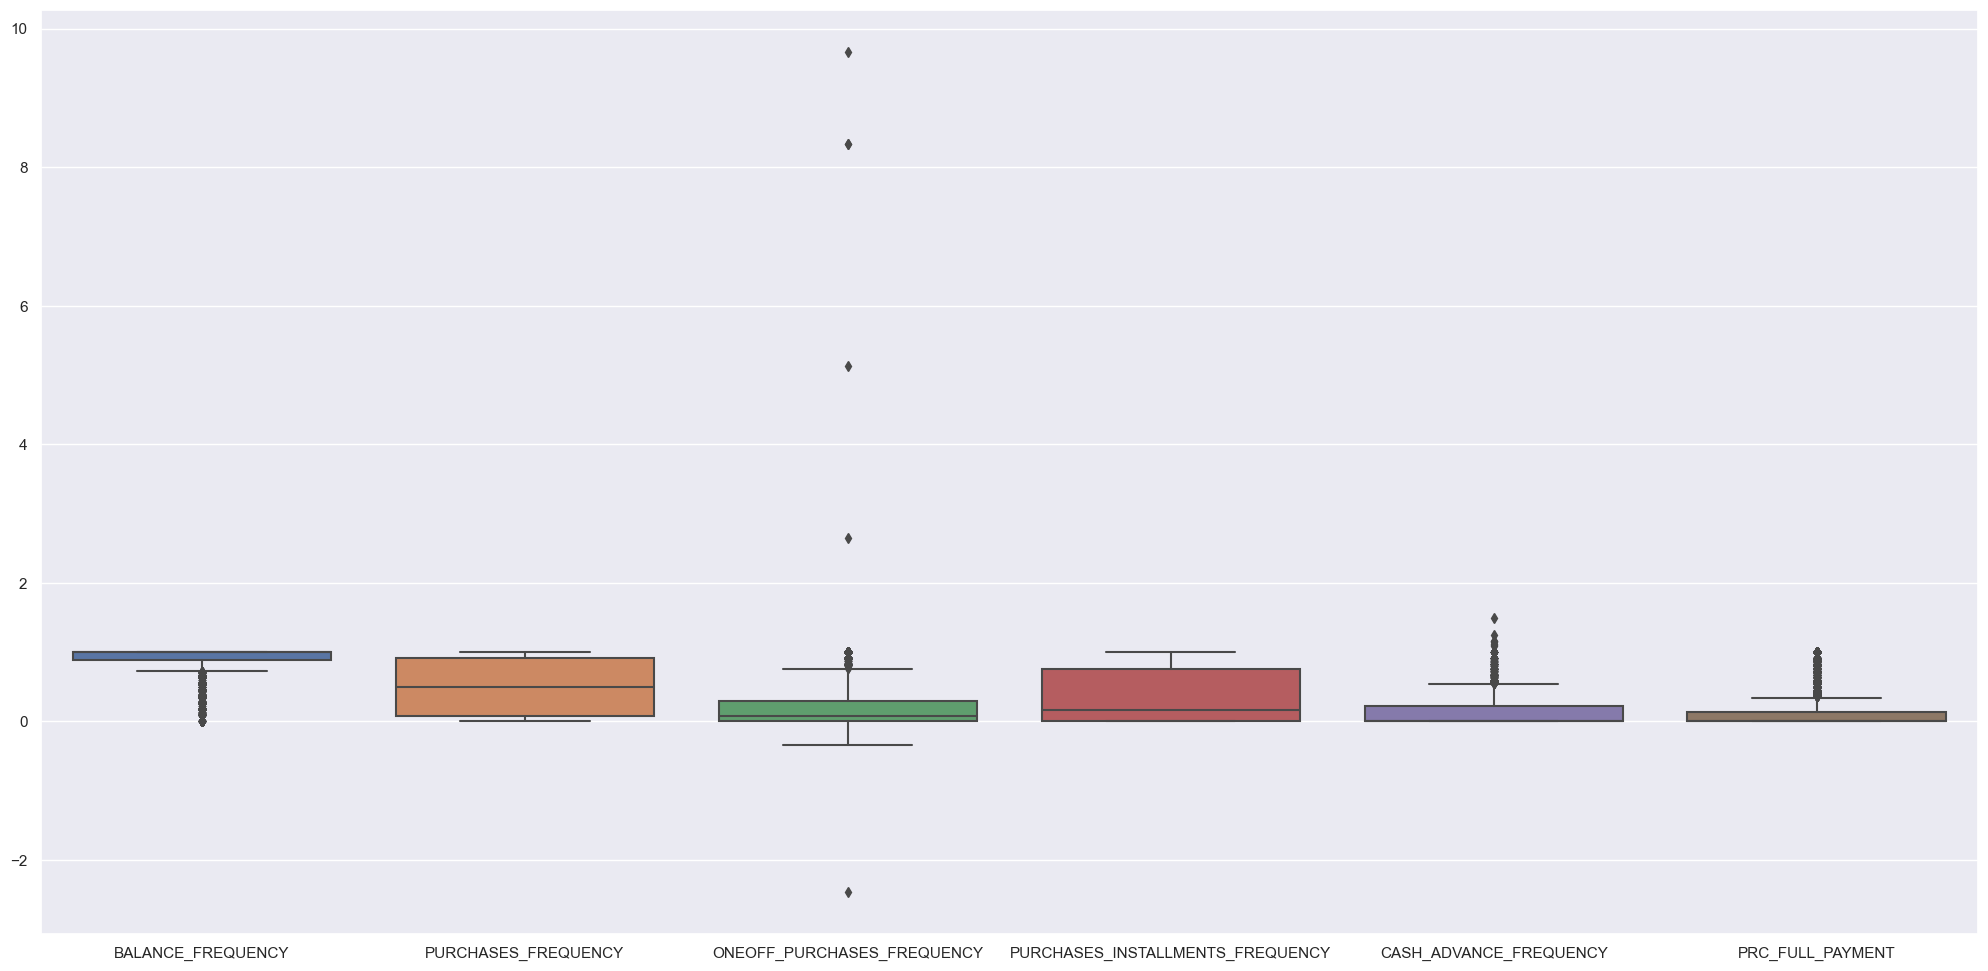

In [7]:
#Seleccion de las frecuencias de los balances de la cuenta y los tipos de de compra
name_cols_frequency = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]

#Visualización de todas las variables numéricas de iipo Float
fig=plt.figure(figsize=(25,12))
ax = sns.boxplot(data=df_customer[name_cols_frequency], orient="v")

**Análisis** 
<br><br>
Aqui se puede observar que hay varios valores atipicos que se evidencia en las columnas de Compra unica y adelante en efectivo. Donde algunos valores sobrepasan el limite establecido del rango entre [0,1] que representa el porcentaje de frecuencia. Por ejemplo, en la columna de Compra unica hay un valor llega casi a 10, lo que significaria una frecuencia del 1000%.

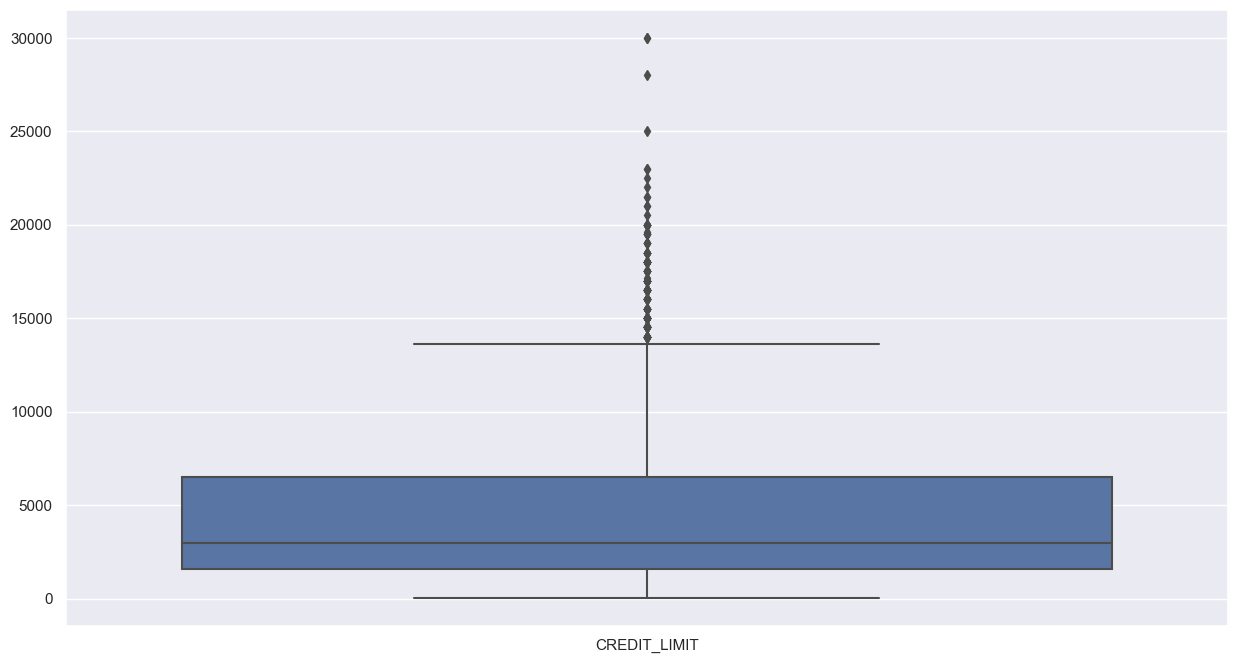

In [8]:
name_col_limit = ["CREDIT_LIMIT"]

#Visualización 
fig=plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df_customer[name_col_limit], orient="v")

**Análisis** 
<br><br>
Aqui se puede observar que hay algunas instancias que se estan muy por encima del promedio, estas lo pueden afectar a los modelos de manera que los puede sesgar. Esto s datos superiores a la media se pueden juntar en un mismo valor de la media o mayor a la media. Tambien se podrian eliminar ya que podrian considerarse no necesarios.

In [9]:
df_customer.TENURE.value_counts()

TENURE
 12    7589
 11     366
 10     236
 6      205
 8      196
 7      190
 9      175
-12       3
-29       1
Name: count, dtype: int64

**Análisis** 
<br><br>
Aqui podemos notar que tenemos datos que no tiene sentido con respecto al contexto y descripcion de la columna TENURE, la cual describe por cuanto tiempo ha sido cliente esa instancia. Los datos negativos son los que provocan un problema.

In [10]:
# Vamos relaciones entre las variables numericas, en este momento excluiremos BALANCE por lo que tiene instancias de datos
# que no son de tipo numerico y CUST_ID no tiene relevancia en el analisis.

df_customer_cols_sels=df_customer.copy().drop(columns=["CUST_ID","BALANCE"])

<Axes: >

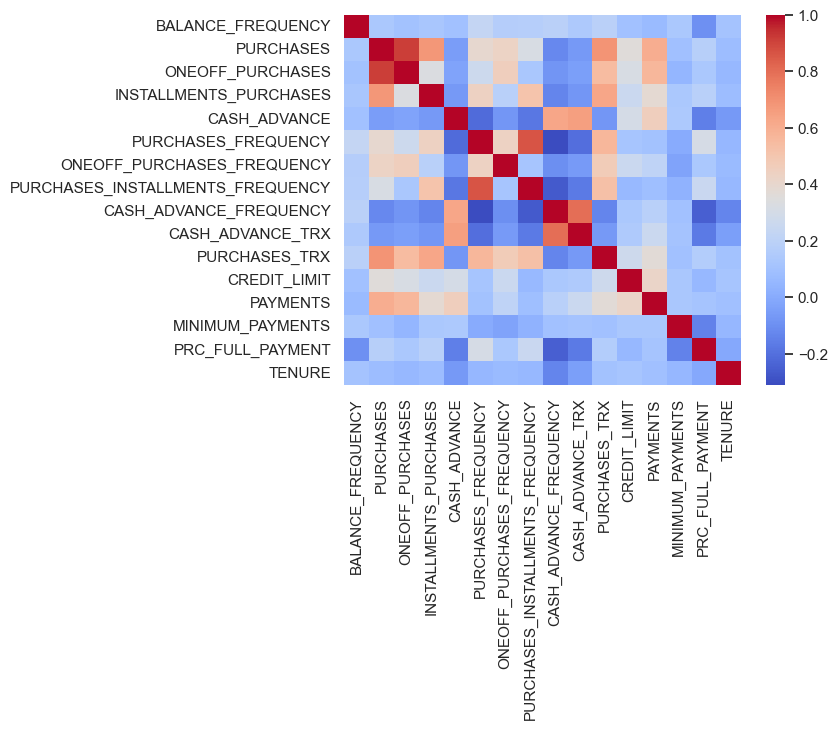

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Aqui normalizaremos los datos
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_customer_cols_sels), columns=df_customer_cols_sels.columns)

# Se hara una matriz de correlacion para que se puede comparar que tanto se relacionan las columnas entre si
correlation_matrix = normalized_df.corr()

# En esta gráfica de tipo heatmap va mostrar las correlaciones
sns.heatmap(correlation_matrix, cmap='coolwarm')

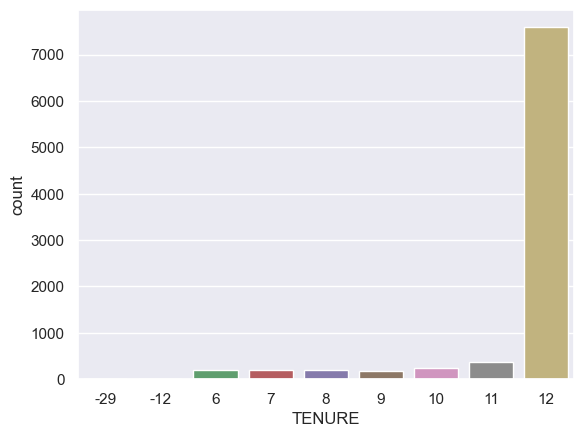

In [12]:
# Visualmente ver la cantidad de valores y de filas x valor
ax = sns.countplot(x='TENURE', data=df_customer)

C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


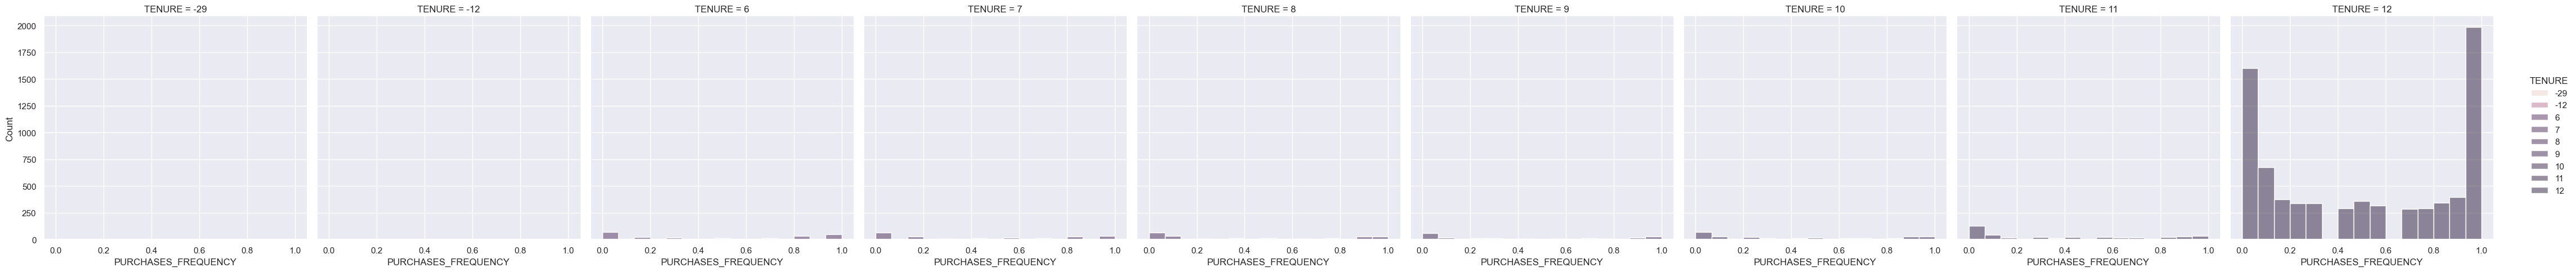

In [13]:
sns.displot(data=df_customer, x="PURCHASES_FREQUENCY", hue="TENURE", col="TENURE")

**Análisis**

En las anterior graficas podemos ver que la mayoria de los datos se encuentran en los clientes que han estado 12 meses con la empresa, se podrian cosiderar no necesarios a los usuarios que estan por debajo de los 12 meses ya que no representan un gran procentaje de la informacion. Aun asi pueden ser utiles para un analisis puramente de "nuevos clientes".

## 1.4. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez. En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación.

### 1.3.1 Completitud - Análisis de valores nulos o vacíos

In [14]:
# Cálculo de porcentaje de valores nulos por columna
((df_customer.isnull().sum()/df_customer.shape[0])).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.034929
ONEOFF_PURCHASES_FREQUENCY          0.001451
CASH_ADVANCE                        0.001116
CREDIT_LIMIT                        0.000781
CUST_ID                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE                             0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

En este punto se puede evidencuar que 4 (MINIMUM_PAYMENTS, ONEOFF_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT) columnas tienen un porcentaje mayor a 0 de datos vacios, lo cual significa que algunas instancias de usuarios tienen huecos en esas columnas. El que mas sobresale es MINIMUM_PAYMENTS con un porcentaje del 0.034929.

Aun asi, se podria argumentar que las instancias vacias de MINIMUM_PAYMENTS, ONEOFF_PURCHASES, CASH_ADVANCE pueden ser candidatas a ser remplazadas por la  0 por que puede ser que no el usuario no ha hecho ese tipo de movimientos. En cambio CREDIT_LIMIT, puede que no se incluya en los modelos a realizar pero aun asi se podria tener en cuenta remplazar esos valores de la media para no perder la informacion de esas filas.

### 1.3.2. Unicidad

Aqui no puede haber excusas de que hayan duplicados de filas debido al contexto del negocio y a la informacion prevista. En este caso, no puede haber dos clientes con el mismo ID que seria una incongruencia aunque cierta informacion se puede repetir en otras columnas. Lo ideal seria elminarlas para que no generen problemas a la hora de hacer los modelos.

In [15]:
print('Total de filas repetidas:', df_customer.duplicated(keep = False).sum())

Total de filas repetidas: 20


Aqui podemos evidenciar que hubo 20 filas repetidas de 8961.

### 1.3.3. Consistencia

In [16]:
# Aqui revisaremos los valores de variable TENUR, la cual hace referencia del tiempo en meses que lleva el cliente con la empresa.
# Como ya se habia mencionado antes, los valores negativos no tienen mucho sentido por que no se puede decir que un cliente ha estado -29 meses con la empresa.
df_customer.TENURE.value_counts()

TENURE
 12    7589
 11     366
 10     236
 6      205
 8      196
 7      190
 9      175
-12       3
-29       1
Name: count, dtype: int64

In [17]:
# Ver los valores maximos y minimos de las columnas ONEOFF_PURCHASES_FREQUENCY y CASH_ADVANCE_FREQUENCY 
cols_select=["ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
df_customer_cols_sels=df_customer[cols_select].copy()

df_customer_cols_sels.describe().loc[['min', 'max']]

,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
min,-2.45640,0.0
max,9.66667,1.5


Segun el diccionario de datos, las columnas de frecuencia solo tiene un rango de 0 a 1 dado a que representan un porcentaje del 0 al 100. Pero como se puede evidenciar, estas dos columnas exceden esos limites en especial ONEOFF_PURCHASES_FREQUENCY.

### 1.3.4. Validez

In [18]:
column_type = df_customer['BALANCE'].dtype
print("El tipo de dato que deberia ser BALANCE es float64 pero segun los datos es: {}".format(column_type))

El tipo de dato que deberia ser BALANCE es float64 pero segun los datos es: object


## 2. Preparacion de los datos


### 2.1 Corrección de Validez


Lo primero que debemos hacer para preparar nuestro conjunto de datos es cambiar el tipo de dato de la columna BALANCE. Como vimos previamente al revisar la información de los datos, esta columna tiene como tipo de dato 'object'. Sin embargo, al remitirnos al diccionario de datos y revisar el documento CSV, podemos observar que estos datos son de tipo 'float64', ya que corresponden al promedio del balance mensual. 

In [19]:
# Se cambia el tipo de dato de la columna BALANCE de Object a Float64
df_customer = df_customer[df_customer['BALANCE'].str.contains(r'^[+-]?\d*\.?\d+$')]
df_customer['BALANCE'] = (df_customer["BALANCE"]).astype("float")
print(df_customer['BALANCE'])


0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8956      28.493517
8957      19.183215
8958      23.398673
8959      13.457564
8960     372.708075
Name: BALANCE, Length: 8955, dtype: float64


**Análisis** 
<br><br>
Al convertir la columna a float pudimos observar que habian unos pocos valores que estaban mal escritos por lo que se procedio a borrar esas filas.

### 2.2 Corrección de Completitud



2.1.1 Antes de borrar las filas con datos nulos debemos considerar que en una de las columnas la cantidad de datos de este tipo es bastante significativa por lo que seria un error hacerlo. La columna a la que nos referimos es la de pagos minimos, en esta columna el pago minimo es de 0, por lo que asumiermos que estos valores nulos es que el cliente no realizo ningun pago y los llenaremos con cero. 

In [20]:
df_customer['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

TOCA PONER AQUI COMO QUE LA COLUMNA YA NO TIENE NULOS


2.2.2 Se eliminan todas las filas con valores nulos en alguna de las variables.

In [21]:
#Se mira porcentajes de nulos ahroa
((df_customer.isnull().sum()/df_customer.shape[0])).sort_values(ascending=False)

ONEOFF_PURCHASES_FREQUENCY          0.001452
CASH_ADVANCE                        0.001117
CREDIT_LIMIT                        0.000782
CUST_ID                             0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PRC_FULL_PAYMENT                    0.000000
MINIMUM_PAYMENTS                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE                             0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

In [22]:
df_customer.dropna(inplace = True)

MOSTRAR QUE NO HAY NULOS

### 2.3 Corrección de la Unicidad




2.3.1 Borrar que esten completamente duplicadas.
Despues de identificadas las filas cuyos valores en cada variables sean iguales, se procede a borrar los duplicados.

In [23]:
# Se eliminan las filas duplicadas 
df_customer.drop_duplicates(subset = df_customer.columns[:], inplace = True)
df_customer.shape



(8914, 18)

2.4 Correccion de Consistencia



correccion para las columnas

2.4.1
primero se ajustan los valores de estas dos columnas para que esten entre 0 y 1

In [24]:
columnasSeleccionadas= ["ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
for columna in columnasSeleccionadas:
    df_customer = df_customer[(df_customer[columna] >= 0) & (df_customer[columna] <= 1)]

Se verifica los valores

In [25]:
cols_select=["ONEOFF_PURCHASES_FREQUENCY","CASH_ADVANCE_FREQUENCY"]
df_customer_cols_sels=df_customer[cols_select].copy()

df_customer_cols_sels.describe().loc[['min', 'max']]

,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
min,0.0,0.0
max,1.0,1.0


AHORA EN LA COLUMNA TAL SE VERIFICA QUE SEAN MAYORES A 0

In [26]:
df_customer = df_customer[(df_customer["TENURE"] >= 0)]
df_customer = df_customer[(df_customer["BALANCE"] >= 0)]

SE VERIFICA EL RANGO DE LA COLUMNA

In [27]:
df_customer.shape

(8888, 18)

In [28]:
df_customer.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.888000e+03,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000
mean,3.003776e+05,0.877183,1004.528936,592.903288,411.927924,974.580527,0.491018,0.202612,0.365034,0.134004,3.226260,14.737961,4487.553795,1730.296172,834.781189,0.154217,11.521040
std,2.015979e+07,0.237066,2140.947814,1663.262296,905.579269,2092.773716,0.401285,0.298548,0.397379,0.197333,6.751734,24.900483,3638.868622,2894.953292,2343.503996,0.292990,1.331769
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,1.269274e+02,0.888889,39.822500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,383.211146,162.960515,0.000000,12.000000
50%,8.695156e+02,1.000000,363.090000,37.150000,89.980000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,288.490792,0.000000,12.000000
75%,2.042886e+03,1.000000,1110.595000,579.017500,469.897500,1111.028435,0.916667,0.300000,0.750000,0.205556,4.000000,17.000000,6500.000000,1899.978541,786.448599,0.142857,12.000000
max,1.534969e+09,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [29]:
# Realizar una copia del datafram para no perjudicar los datos
df_copia = df_customer.copy()

# Calcula la media y la desviación estándar de las columnas balance y avg_spend en todo el DataFrame
mean_balance = df_copia['BALANCE'].mean()
std_balance = df_copia['BALANCE'].std()

mean_avg_spend = df_copia['PURCHASES'].mean()
std_avg_spend = df_copia['PURCHASES'].std()

mean_cash_advance = df_copia['CASH_ADVANCE'].mean()
std_cash_advance = df_copia['CASH_ADVANCE'].std()

# Normaliza las columnas balance y avg_spend restando la media y dividiendo por la desviación estándar
df_copia['BALANCE_NORM'] = (df_copia['BALANCE'] - mean_balance) / std_balance
df_copia['PURCHASES_NORM'] = (df_copia['PURCHASES'] - mean_avg_spend) / std_avg_spend

In [30]:
df_copia.shape

(8888, 20)

In [31]:
df_copia.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_NORM,PURCHASES_NORM
count,8.888000e+03,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8.888000e+03,8.888000e+03
mean,3.003776e+05,0.877183,1004.528936,592.903288,411.927924,974.580527,0.491018,0.202612,0.365034,0.134004,3.226260,14.737961,4487.553795,1730.296172,834.781189,0.154217,11.521040,-6.395524e-18,3.197762e-17
std,2.015979e+07,0.237066,2140.947814,1663.262296,905.579269,2092.773716,0.401285,0.298548,0.397379,0.197333,6.751734,24.900483,3638.868622,2894.953292,2343.503996,0.292990,1.331769,1.000000e+00,1.000000e+00
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000,-1.489984e-02,-4.691982e-01
25%,1.269274e+02,0.888889,39.822500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,383.211146,162.960515,0.000000,12.000000,-1.489354e-02,-4.505978e-01
50%,8.695156e+02,1.000000,363.090000,37.150000,89.980000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,288.490792,0.000000,12.000000,-1.485671e-02,-2.996051e-01
75%,2.042886e+03,1.000000,1110.595000,579.017500,469.897500,1111.028435,0.916667,0.300000,0.750000,0.205556,4.000000,17.000000,6500.000000,1899.978541,786.448599,0.142857,12.000000,-1.479850e-02,4.954164e-02
max,1.534969e+09,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,7.612525e+01,2.243634e+01


In [32]:
df_copia.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_NORM,PURCHASES_NORM
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,-0.014898,-0.424639
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,-0.014776,-0.108064
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.0,12,-0.014817,0.230959
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,-0.014859,-0.461725
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12,-0.014810,0.153554


In [33]:
cantidad_negativos = (df_copia['BALANCE'] < 0).sum()

print("Cantidad de valores negativos en la columna 'mi_columna':", cantidad_negativos)

Cantidad de valores negativos en la columna 'mi_columna': 0


## 3. Modelamiento

### 3.1. Algoritmo 1 - DBSCAN

Este algoritmo lo va a realizar el integrante **Nicolas Diaz Motañana**. El algoritmo de DBSCAN es un algoritmo de agrupamiento, ha diferencia de K-Means, que no requiere especificar el nuemro de clusteres de antemano y tiene la capacidad de identificar clusteres de manera arbitraria y con diferentes tamaños a partir de datos con alto nivel de dimensionalidad.

### 3.1.1. Identificar las variables a utilizar

Antes de empezar volveremos hacer el heatmap con los datos ya preparados, eso significa que ahora estara encluido la columna BALANCE entre los datos y tendremos una relacion clara de como los datos numerico interactuan entre si.

<Axes: >

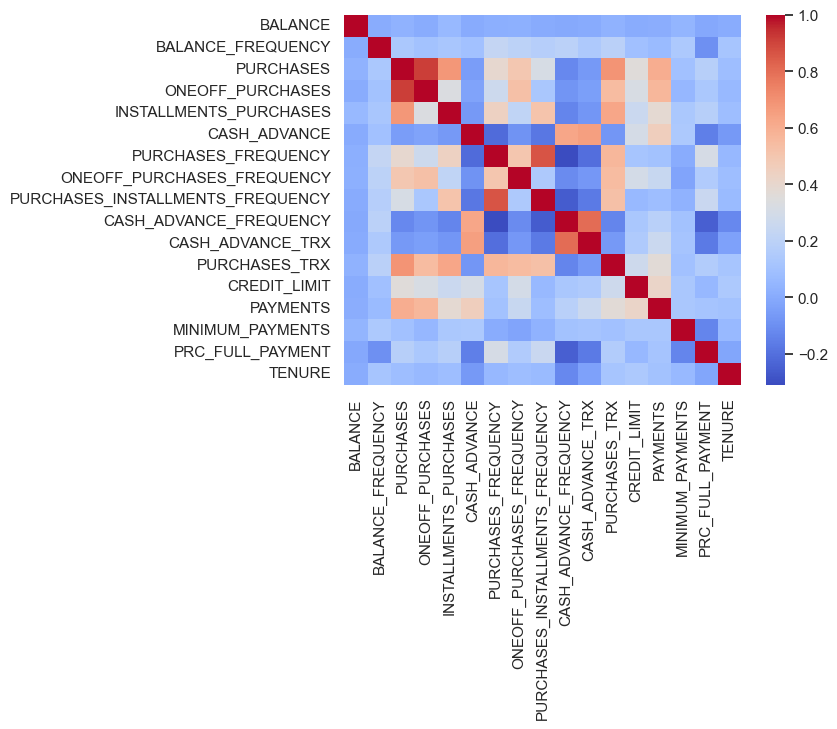

In [34]:
from sklearn.preprocessing import MinMaxScaler

df_copia_cols_sels=df_copia.copy().drop(columns=["CUST_ID", "BALANCE_NORM", "PURCHASES_NORM"])

# Aqui normalizaremos los datos
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df_copia_cols_sels), columns=df_copia_cols_sels.columns)

# Se hara una matriz de correlacion para que se puede comparar que tanto se relacionan las columnas entre si
correlation_matrix = normalized_df.corr()

# En esta gráfica de tipo heatmap va mostrar las correlaciones
sns.heatmap(correlation_matrix, cmap='coolwarm')

//TODO

In [47]:
# Empecemos con calma, vamos a ver que se evidenciamos a partir de la 
# seleccion del subconjunto de las siguintes columnas sin normalizar 
# "BALANCE_", "PURCHASES", "CASH_ADVANCE", "PAYMENTS", 
first_model_selec = ["ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_FREQUENCY", "PURCHASES_TRX"]
df_copia_model = df_copia[first_model_selec].head(1000).copy()

In [48]:
df_copia_model

,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_TRX
0,0.000000,0.166667,2
2,1.000000,1.000000,12
3,0.083333,0.083333,1
4,0.083333,0.083333,1
5,0.000000,0.666667,8
...,...,...,...
519,0.000000,0.000000,0
520,0.000000,0.000000,0
521,0.000000,1.000000,19
522,0.000000,0.583333,14


### 3.1.2. Construir el modelo

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normaliza los datos
scaler = StandardScaler()
df_modelo_norm = scaler.fit_transform(df_copia_model)

# Realiza la reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
df_modelo_pca = pca.fit_transform(df_modelo_norm)

# Crea y entrena el modelo DBSCAN
dbscan = DBSCAN(eps=2.854, min_samples=5)
dbscan.fit(df_modelo_norm)

print("Etiquetas de los clusters:")
print(dbscan.labels_)

Etiquetas de los clusters:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

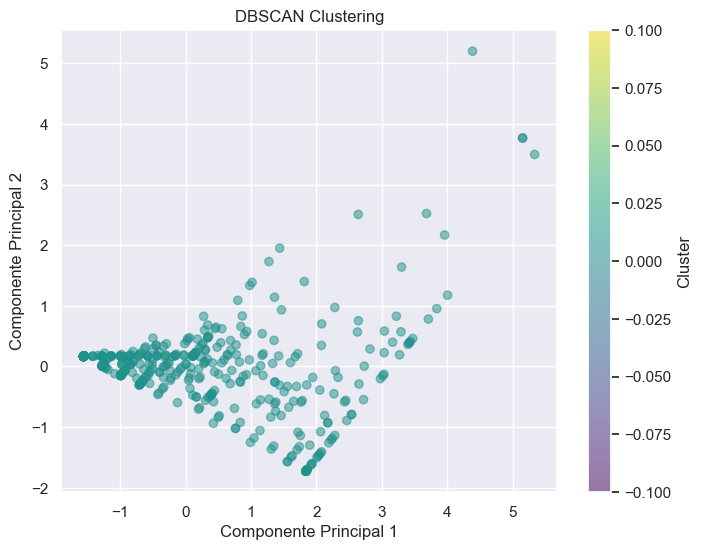

In [50]:
# Visualiza los resultados
plt.figure(figsize=(8, 6))

# Grafica los puntos de datos
plt.scatter(df_modelo_pca[:, 0], df_modelo_pca[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5)

# Ajusta los parámetros del gráfico
plt.title('DBSCAN Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')

plt.show()

### 3.1.3. Visualizar el resultado

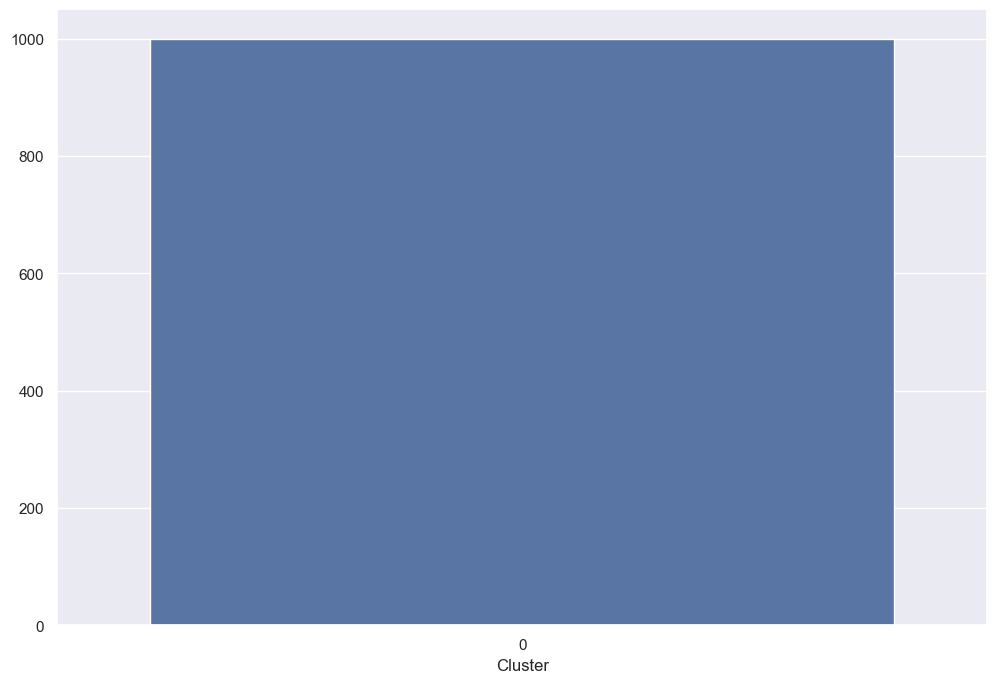

In [39]:
# Revisar la cantidad de registros en los grupos resultado
labels = dbscan.labels_
df_copia_model['Cluster'] = labels

cluster_distrib = df_copia_model['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [40]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_copia_model.groupby('Cluster').count()

,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_TRX
Cluster,,,
0,1000,1000,1000


In [41]:
#Transformar el contenido de las columnas a arreglo para facilitar aplicar funciones como las de visualización
cols_number = df_copia_model.to_numpy()
cols_number

array([[ 0.      ,  0.166667,  2.      ,  0.      ],
       [ 1.      ,  1.      , 12.      ,  0.      ],
       [ 0.083333,  0.083333,  1.      ,  0.      ],
       ...,
       [ 0.25    ,  0.833333, 12.      ,  0.      ],
       [ 0.166667,  1.      , 15.      ,  0.      ],
       [ 0.083333,  0.083333,  1.      ,  0.      ]])

In [42]:
df_copia_model

,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_TRX,Cluster
0,0.000000,0.166667,2,0
2,1.000000,1.000000,12,0
3,0.083333,0.083333,1,0
4,0.083333,0.083333,1,0
5,0.000000,0.666667,8,0
...,...,...,...,...
1024,0.090909,0.090909,1,0
1025,0.083333,0.083333,2,0
1026,0.250000,0.833333,12,0
1027,0.166667,1.000000,15,0


C:\Users\nicod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


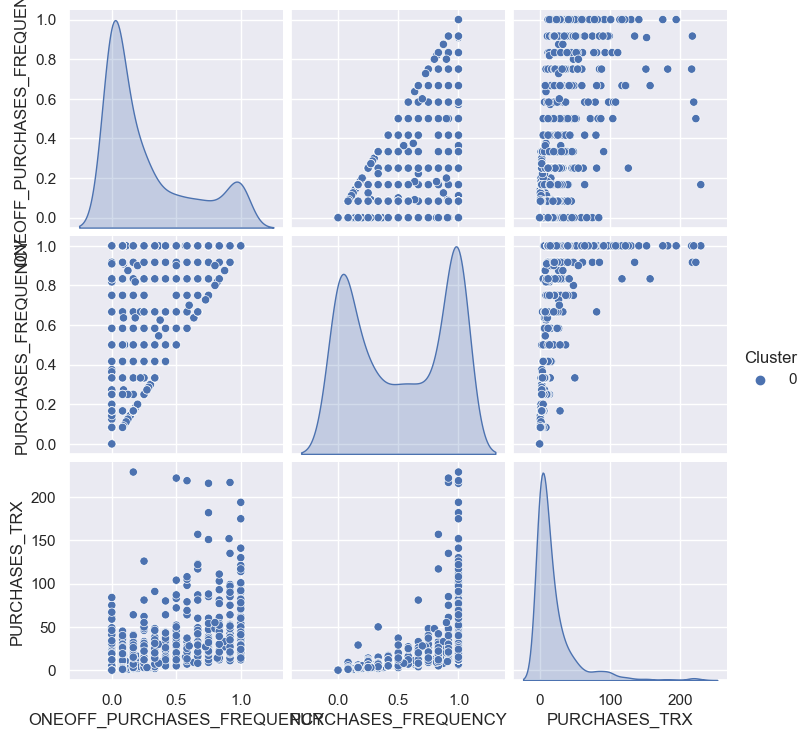

In [43]:
sns.pairplot(data=df_copia_model, hue="Cluster")

## 4. Validación

### 4.1. DBSCAN

### 4.1.1. Evaluar la calidad del modelo construido.

Se identifican dos tipos de evaluación: cuantitativa y cualitativa. Desde el punto de vista cuantitativo vamos a utilizar la "silueta" que es lo que observamos en la celda siguiente.

In [44]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

In [45]:
# Esta función puede tardar varios minutos
# Un valor cercano a 1 es un indicador de un bueno modelo. Revisa la teoría para comprender mejor el concepto
plot_silhouette(data = df_copia_model, 
                labels = dbscan.labels_, 
                ylabel = 'Modelo de dos Agrupaciones')

[0]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)